Drug Review Dataset

In this dataset, I aim to understand which drugs and conditions are listed. I will map the drug with the condition and then tally drugs and conditions. 

I will attempt to answer:

1. Which are the most and least popular drugs
2. Is any one drug used for more than one clinical indication? 
3. Which drugs are used for a wide range of clinical conditions?

The stages to this review include:
- data preprocessing. The intent of this stage will be to remove NAs, duplicates, and unwanted values.
  

If I have an opportunity, I will attempt to take a deeper dive into the findings. I will employ NLP and tokenize reviews. I will perform a sentiment analysis on the tokens. 

Sentiments will be grouped as either:

1. positive,
2. neutral or
3. negative reviews

From this I will then look to see if certain drugs or even conditions more likely to yield a particular sentiment?

In the first instance I will conduct data preprocessing. 

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns

import math
import matplotlib.pyplot as plt


In [56]:
drug_data_df=pd.read_csv("/Users/sunuber/Desktop/drugsdata.csv")

In [57]:
drug_data_df.head(5)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [58]:
drug_data_df.shape

(53766, 7)

This dataset contains over 53 thousand rows and seven columns.

In [59]:
drug_data_df.info

<bound method DataFrame.info of        uniqueID         drugName                     condition  \
0        163740      Mirtazapine                    Depression   
1        206473       Mesalamine  Crohn's Disease, Maintenance   
2        159672          Bactrim       Urinary Tract Infection   
3         39293         Contrave                   Weight Loss   
4         97768  Cyclafem 1 / 35                 Birth Control   
...         ...              ...                           ...   
53761    159999        Tamoxifen     Breast Cancer, Prevention   
53762    140714     Escitalopram                       Anxiety   
53763    130945   Levonorgestrel                 Birth Control   
53764     47656       Tapentadol                          Pain   
53765    113712        Arthrotec                      Sciatica   

                                                  review  rating       date  \
0      "I&#039;ve tried a few antidepressants over th...      10  28-Feb-12   
1      "My son ha

In [60]:
missing_values= drug_data_df.isnull()
print(missing_values)

       uniqueID  drugName  condition  review  rating   date  usefulCount
0         False     False      False   False   False  False        False
1         False     False      False   False   False  False        False
2         False     False      False   False   False  False        False
3         False     False      False   False   False  False        False
4         False     False      False   False   False  False        False
...         ...       ...        ...     ...     ...    ...          ...
53761     False     False      False   False   False  False        False
53762     False     False      False   False   False  False        False
53763     False     False      False   False   False  False        False
53764     False     False      False   False   False  False        False
53765     False     False      False   False   False  False        False

[53766 rows x 7 columns]


In [61]:
missing_values=drug_data_df.isnull().sum()
print(missing_values)

uniqueID         0
drugName         0
condition      295
review           0
rating           0
date             0
usefulCount      0
dtype: int64


In [62]:
drug_data_df.isna().sum()*100/len(drug_data_df)

uniqueID       0.000000
drugName       0.000000
condition      0.548674
review         0.000000
rating         0.000000
date           0.000000
usefulCount    0.000000
dtype: float64

I've used a few ways to determine the number and percentage of null values in the dataset. Over 0.5% of null values are attributable to the conditons row.

In [63]:
drug_data_df.dropna(axis=0) #it will go through whole dataframe, and delete missing values 

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


In [64]:
#sanity check
drug_data_df.dropna(axis=0).isna().sum()

uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [65]:
drug_data_df=drug_data_df.dropna(axis=0)

In [66]:
drug_data_df=drug_data_df.drop('uniqueID', axis=1)

In [67]:
drug_data_df.head(10)

,drugName,condition,review,rating,date,usefulCount
0,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
5,Zyclara,Keratosis,"""4 days in on first 2 weeks. Using on arms an...",4,3-Jul-14,13
6,Copper,Birth Control,"""I&#039;ve had the copper coil for about 3 mon...",6,6-Jun-16,1
7,Amitriptyline,Migraine Prevention,"""This has been great for me. I&#039;ve been on...",9,21-Apr-09,32
8,Methadone,Opiate Withdrawal,"""Ive been on Methadone for over ten years and ...",7,18-Oct-16,21
9,Levora,Birth Control,"""I was on this pill for almost two years. It d...",2,16-Apr-11,3


In [68]:
count=pd.Series('drugName')

The intent of this code is to look at whether removing the nulls has indeed worked in the drugName column.

In [69]:
print(count)

0    drugName
dtype: object


After the preprocessing of data, my intent is to look at the commonly used drugs in this dataset and map this to the conditions. 

1. Which drugs are used for the greatest number of conditions?
2. How many entries are there for each drug?
3. For which conditions is each drug used for? 
4. Is there any overlap between drugs treating a condition - have three drugs been used to treat the same, identical condition?

 

In [70]:
df=pd.DataFrame(drug_data_df)

In [71]:
popular_drugs=df['drugName'].value_counts()

In [72]:
print('Most popular drugs in dataset:')
print(popular_drugs)

Most popular drugs in dataset:
drugName
Levonorgestrel                       1265
Etonogestrel                         1081
Ethinyl estradiol / norethindrone     869
Nexplanon                             736
Ethinyl estradiol / norgestimate      649
                                     ... 
Stromectol                              1
Loestrin Fe 1 / 20                      1
Onfi                                    1
Nimotop                                 1
FluMist                                 1
Name: count, Length: 2635, dtype: int64


In [73]:
popular_conditions=df['condition'].value_counts()

In [74]:
print('Most popular conditions in this dataset:')
print(popular_conditions)

Most popular conditions in this dataset:
condition
Birth Control                                  9648
Depression                                     3095
Pain                                           2100
Anxiety                                        1908
Acne                                           1847
                                               ... 
Gender Dysphoria                                  1
83</span> users found this comment helpful.       1
Meningococcal Meningitis Prophylaxis              1
Tympanostomy Tube Placement Surgery               1
Strongyloidiasis                                  1
Name: count, Length: 708, dtype: int64


The five most popular 'conditions', or symptoms treated in this dataset are:

1. drugs which provide suitable birth control
2. drugs used to treat certain depressive states
3. drugs used to provide pain relief
4. drugs used to treat certain anxiety states
5. and lastly acne

Lets' explore what the top drugs might be from this dataset. 

I will plot a bar chart to see which drugs are the most commonly used in this dataset.

In [75]:
df.head(5)

,drugName,condition,review,rating,date,usefulCount
0,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


Text(0.5, 1.0, 'Top10 Drugs: Number of drugs used')

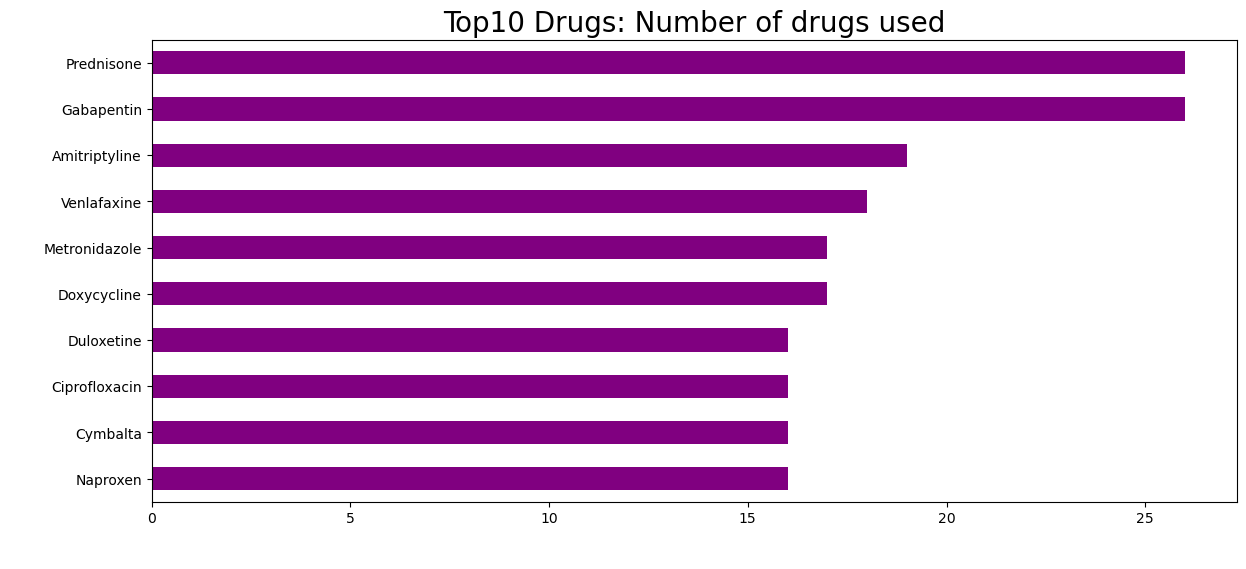

In [76]:
# 
temp_df=drug_data_df.groupby('drugName')['condition'].nunique().sort_values(ascending=False)[0:10]
temp_df.sort_values(ascending=True).plot(kind="barh", figsize=(14,6), fontsize=10, color="purple")
plt.xlabel(" ", fontsize=20)
plt.ylabel(" ", fontsize=20)
plt.title("Top10 Drugs: Number of drugs used", fontsize=20)

The top five drugs are:

1. gabapentin,
2. prednisolone,
3. amitryptylline,
4. venlafaxine,
5. doxycycline 

What is interesting is that these drugs are commonly used to treat certain types of pain, depression. Doxycycline is an antibiotic used to treat a range of infections, it is also clinically indicated for the use of acne.

Out of interest, I will list the bottom drugs used in this dataset.

Text(0.5, 1.0, 'Lowest 10: Number of drugs used per condition')

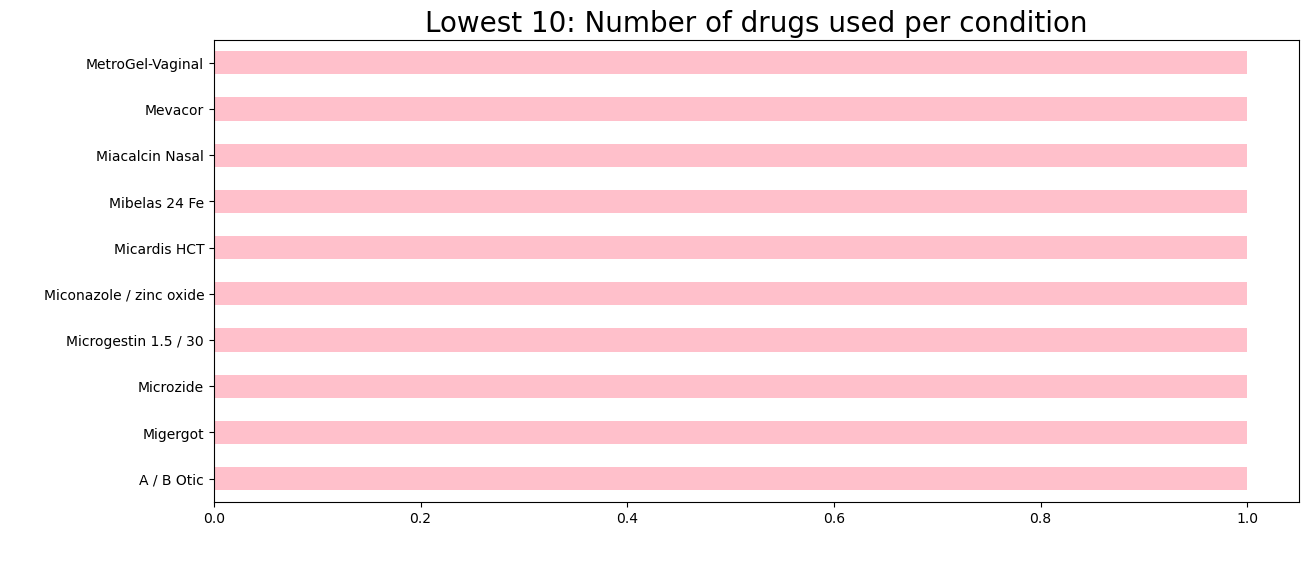

In [77]:
temp_df=drug_data_df.groupby('drugName')['condition'].nunique().sort_values(ascending=True)[0:10]
temp_df.plot(kind="barh", figsize=(14,6), fontsize=10, color="pink")
plt.xlabel(" ", fontsize=20)
plt.ylabel(" ", fontsize=20)
plt.title("Lowest 10: Number of drugs used per condition", fontsize=20)

The least commonly used used in this dataset are:

1. Metrogel Vaginal (metronidazole generic name, used to treat vaginal infections)
2. Mevacor (lovastatin, generic name, for high cholesterol)
3. Miacalcin Nasal (calcitonin, generic, for osteoporosis prevention in post menopausal women)
4. Mibelas 24 Fe (norethindrone acetate, ethinyl estradiol and ferrous fumarate, birth control)
5. Micardis HCT (telmesartan and hydrochlorotiazide, angiotensin receptor blocker and a thiazide-diuretic, for essential high blood pressure)
6. miconazole/zinc oxide topical application (usually used to treat nappy rash in babies and yeast infections in adults)
7. Microgestin 1.5/3.0 (norethindrone and ehtinyl estradiol, birth control)
8. Microzide (hydrochlorothiazide, used to treat high blood pressure)
9. Migergot (ergotamine and caffeine suppository, used to treat migraines or vascular headaches)
10. A/B Otic (antipyrine and benzocaine, used to treat and relief symptoms of ear infections)

These drugs are used to treat more obscure conditions. Perhaps users are less likely to provide a review for something which is more difficult to tell whether it's treated a symptom. For example, how can a lay person 'feel healthier' after having taken a drug for high cholesterol? Maybe the benefits to taking these medications cannot be limited to a positive review insisting an immediate beenfit to its use. For these reasons, if I have more time, I intend to employ some kind of NLP, looking more closely at sentiment analysis.

In [78]:
#how many drugs from the dataset only treat one condition?
pop_drugs_conditions=df.groupby(by='drugName')['condition'].nunique()
single_condition_drugs=pop_drugs_conditions[pop_drugs_conditions ==1]
count_single_condition_drugs=pop_drugs_conditions.count()
print(count_single_condition_drugs)

2635


From this dataset, there are 2635 drugs used to treat one clinical indication.

In [79]:
#which drugs are used for the greatest number of conditions?
pop_drugs_conditions=df.groupby(by='drugName')['condition'].nunique()
pop_drugs_conditions.head()

drugName
A / B Otic                               1
Abacavir / dolutegravir / lamivudine     1
Abacavir / lamivudine                    1
Abatacept                                1
Abilify                                 11
Name: condition, dtype: int64

In [80]:
pop_drugs_conditions.sort_values(ascending=False)

drugName
Gabapentin             26
Prednisone             26
Amitriptyline          19
Venlafaxine            18
Doxycycline            17
                       ..
Galantamine             1
Gadoxetate disodium     1
Gabitril                1
Gabarone                1
pHisoHex                1
Name: condition, Length: 2635, dtype: int64

In [81]:
drug_name='Gabapentin'
filter=df['drugName']==drug_name
df[filter]

,drugName,condition,review,rating,date,usefulCount
41,Gabapentin,Bipolar Disorde,"""I started taking gabapentin experimentally to...",8,24-Sep-14,75
193,Gabapentin,ibromyalgia,"""It honestly helps a lot for my nerve pain, I ...",9,17-May-16,43
229,Gabapentin,Pain,"""I have a bulging disc and low back that has d...",9,9-May-10,37
245,Gabapentin,Anxiety,"""Ok, its funny i found this page because it...",8,9-May-16,66
259,Gabapentin,Anxiety,"""I was prescribed this for Anxiety never shoul...",1,24-Nov-16,40
...,...,...,...,...,...,...
53200,Gabapentin,Restless Legs Syndrome,"""I have been suffering from Restless legs synd...",10,25-Nov-13,126
53436,Gabapentin,Anxiety,"""I can&#039;t tolerate SSRI&#039;s. I&#039;ve...",10,31-Oct-13,64
53584,Gabapentin,Restless Legs Syndrome,"""I feel that this medication has given my life...",6,30-Dec-15,48
53607,Gabapentin,Peripheral Neuropathy,"""This is the only drug that works for me. I us...",7,25-Jul-09,30


In [82]:
df[filter]['condition'].unique()

array(['Bipolar Disorde', 'ibromyalgia', 'Pain', 'Anxiety',
       'Peripheral Neuropathy', 'Migraine',
       'Diabetic Peripheral Neuropathy', 'Restless Legs Syndrome',
       'Occipital Neuralgia', 'Postherpetic Neuralgia', 'Insomnia',
       'Neuropathic Pain', 'Hot Flashes', 'Alcohol Withdrawal', 'Hiccups',
       'Epilepsy', 'Reflex Sympathetic Dystrophy Syndrome',
       'Spondylolisthesis', 'Not Listed / Othe', 'Vulvodynia', 'Cough',
       'Trigeminal Neuralgia', 'Pruritus',
       'Periodic Limb Movement Disorde',
       'Nausea/Vomiting, Chemotherapy Induced', 'Benign Essential Trem'],
      dtype=object)

In [83]:
gabapentin_conditions=df[filter][['condition']].value_counts().rename_axis('unique_values').reset_index(name='counts')

In [84]:
gabapentin_conditions.head(5)

,unique_values,counts
0,Anxiety,67
1,Pain,63
2,ibromyalgia,38
3,Peripheral Neuropathy,33
4,Restless Legs Syndrome,21


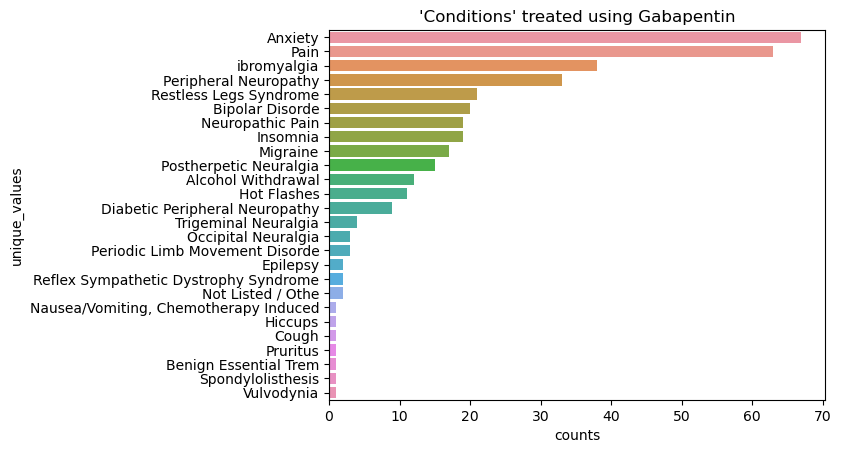

In [85]:
# draw a bar chart, y axis conditions, x axis drug

#import pandas as pd
#import matplotlib.pyplot as plt

#df=pd.DataFrame(drug_data_df)
#filter=df[filter]['condition'].value_counts()
#value_counts.plot(kind='bar', color='skyblue')
#plt.xlabel('Gabapentin')
#plt.ylabel('condition')
#plt.title("conditions treated using Gabapentin")

#plt.show()

sns.barplot(gabapentin_conditions, x="counts", y="unique_values").set(title="'Conditions' treated using Gabapentin");

From the graph above, gabapentin is treated for a wide range of clinical indications. The top five common uses for gabapentin are:

1. anxiety
2. pain management
3. fibromylagia
4. peripheral neuropathy
5. restless legs syndrome

The five least commonly used indications of gabapentin are:
1. vulvodynia
2. spondylolisthesis
3. benign essential tremor
4. pruritus
5. cough

In [86]:
drug_name2='Prednisolone'
filter=df['drugName']==drug_name2
df[filter]



,drugName,condition,review,rating,date,usefulCount
2784,Prednisolone,Postoperative Ocular Inflammation,"""Experiencing muscle pain and weakness, poor s...",2,17-Dec-16,7
13425,Prednisolone,Bullous Pemphigoid,"""I was sliding downhill very fast with Pemphig...",9,28-Sep-15,2
14522,Prednisolone,Postoperative Ocular Inflammation,"""Caused the eye to burn afterwards.""",2,28-May-15,14
19858,Prednisolone,Iritis,"""I am a 75 year old male, and have reoccurring...",8,25-Aug-16,2
40041,Prednisolone,Inflammatory Conditions,"""First time taking pred and was on 40mg for Ul...",6,7-Sep-16,7
43885,Prednisolone,Inflammatory Conditions,"""I had post nasal drip with a cough. It helpe...",5,13-Sep-15,1
46215,Prednisolone,Dermatitis,"""Had itching, redness and rashes between finge...",7,25-Sep-17,0


In [87]:
prednisolone_conditions=df[filter][['condition']].value_counts().rename_axis('unique_values').reset_index(name='counts')

In [88]:
prednisolone_conditions.head(10)

,unique_values,counts
0,Inflammatory Conditions,2
1,Postoperative Ocular Inflammation,2
2,Bullous Pemphigoid,1
3,Dermatitis,1
4,Iritis,1


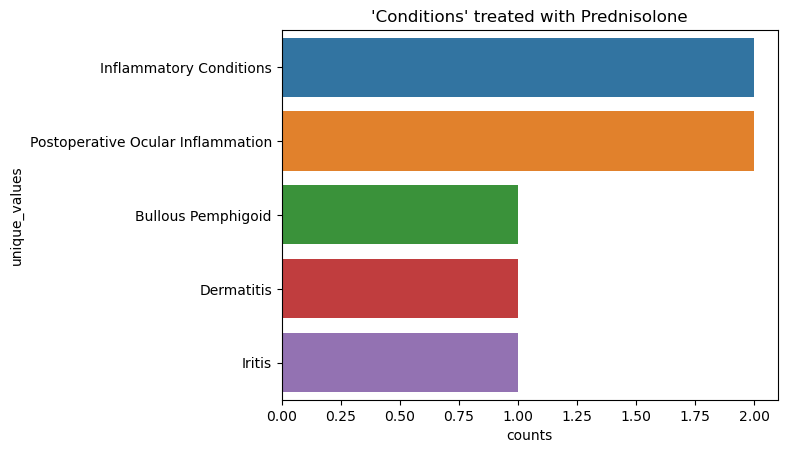

In [89]:
#bar chart
sns.barplot(prednisolone_conditions, x="counts", y="unique_values").set(title="'Conditions' treated with Prednisolone");

Prednisolone is commonly used to treat a range of inflammatory conditions. From this dataset, it is used to treat a group of unclassified and ubiquitous "inflammatory conditions", and also:
1. post surgical ocular inflammation
2. bullous pemphigoid
3. dermatitis
4. iritis

In [90]:
drug_name3='Amitriptyline'
filter=df['drugName']==drug_name3
df[filter]

,drugName,condition,review,rating,date,usefulCount
7,Amitriptyline,Migraine Prevention,"""This has been great for me. I&#039;ve been on...",9,21-Apr-09,32
117,Amitriptyline,ibromyalgia,"""I am a 66 year old post-premenopausal female ...",1,30-Nov-17,0
395,Amitriptyline,Anxiety and Stress,"""I&#039;ve only been taking this for a month. ...",4,13-Feb-14,62
404,Amitriptyline,ibromyalgia,"""I was just diagnosed with Fibromyalgia, was b...",2,17-Jan-11,46
1000,Amitriptyline,ibromyalgia,"""I had unrefreshing sleep, and needed a lot of...",9,9-May-12,122
...,...,...,...,...,...,...
53292,Amitriptyline,Migraine Prevention,"""I had been taking propranolol for migraine pr...",9,20-Sep-13,64
53444,Amitriptyline,Migraine Prevention,"""I have chronic Lyme disease and one of the wo...",10,4-Sep-14,65
53490,Amitriptyline,Anxiety and Stress,"""Started for sleep. No difference with headach...",3,2-Feb-17,10
53520,Amitriptyline,Pain,"""Took it for a few days but could not stay awa...",1,27-Nov-15,20


In [91]:
df[filter]['condition'].value_counts()

condition
Migraine Prevention                      56
Pain                                     42
Insomnia                                 39
ibromyalgia                              25
Anxiety and Stress                       20
Depression                               13
Irritable Bowel Syndrome                 10
Interstitial Cystitis                     5
Cyclic Vomiting Syndrome                  4
Post Traumatic Stress Disorde             2
Reflex Sympathetic Dystrophy Syndrome     1
Chronic Myofascial Pain                   1
m Pain Disorde                            1
Vulvodynia                                1
Cough                                     1
Not Listed / Othe                         1
Somat                                     1
Hyperhidrosis                             1
Pudendal Neuralgia                        1
Name: count, dtype: int64

In [92]:
#barchart
amitriptyline_conditions=df[filter][['condition']].value_counts().rename_axis('unique_values').reset_index(name='counts')

In [93]:
amitriptyline_conditions.head(5)

,unique_values,counts
0,Migraine Prevention,56
1,Pain,42
2,Insomnia,39
3,ibromyalgia,25
4,Anxiety and Stress,20


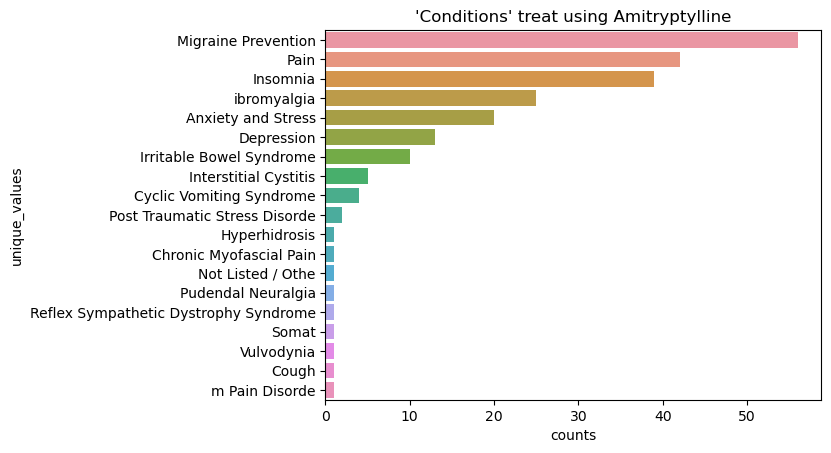

In [94]:
sns.barplot(amitriptyline_conditions, x="counts", y="unique_values").set(title="'Conditions' treat using Amitryptylline");

In this datatset, amitriptyline is commonly used for:

1. treating symptoms of depression
2. treating symptoms of anxiety
3. treating 'anxiety and stress'
4. fibromyalgia
5. and major despressive disorder

It is less commonly used to treat:
1. bulimia
2. 'other' conditions
3. muscular pain disorder
4. irritable bowel syndrome
5. and dissociative identity disorder


There might be overlap here, and thus duplicated entries. 'Anxiety' and 'anxiety and stress' might be the same clinical indications.

In [95]:
drug_name4='Venlafaxine'
filter=df['drugName']==drug_name4
df[filter]

,drugName,condition,review,rating,date,usefulCount
79,Venlafaxine,Depression,"""I was first prescribed Effexor 13 years ago a...",8,13-Dec-10,36
81,Venlafaxine,Depression,"""I took Effexor for the first and last time ye...",1,12-Oct-17,5
223,Venlafaxine,Depression,"""Horrible side effects! I tried Ciprelex (esci...",1,15-Jun-16,24
586,Venlafaxine,Major Depressive Disorde,"""I&#039;ve been on Effexor xr for 2 weeks and ...",10,8-Jul-16,30
712,Venlafaxine,Anxiety,"""I suffered with severe anxiety, especially in...",9,23-Dec-13,22
...,...,...,...,...,...,...
52286,Venlafaxine,Generalized Anxiety Disorde,"""Changes my life for the better!""",10,10-Mar-14,62
52683,Venlafaxine,Anxiety and Stress,"""I have multiple health issues and am very anx...",8,24-Apr-11,13
52904,Venlafaxine,Depression,"""Though the medication helped my depression, I...",3,22-Jan-17,2
52953,Venlafaxine,Depression,"""this med did its job reasonably. Didn&#039;t ...",6,16-Aug-16,1


In [96]:
df[filter]['condition'].value_counts()

condition
Depression                       137
Anxiety                           46
Anxiety and Stress                26
Generalized Anxiety Disorde       24
ibromyalgia                       14
Major Depressive Disorde          14
Bipolar Disorde                   14
Hot Flashes                       12
Social Anxiety Disorde            11
Panic Disorde                      7
Postpartum Depression              4
Post Traumatic Stress Disorde      4
Obsessive Compulsive Disorde       2
Irritable Bowel Syndrome           1
Not Listed / Othe                  1
m Pain Disorde                     1
Dissociative Identity Disorde      1
Bulimia                            1
Name: count, dtype: int64

In [97]:
#barchart
venlafaxine_conditions=df[filter][['condition']].value_counts().rename_axis('unique_values').reset_index(name='counts')

In [98]:
venlafaxine_conditions.head(5)

,unique_values,counts
0,Depression,137
1,Anxiety,46
2,Anxiety and Stress,26
3,Generalized Anxiety Disorde,24
4,ibromyalgia,14


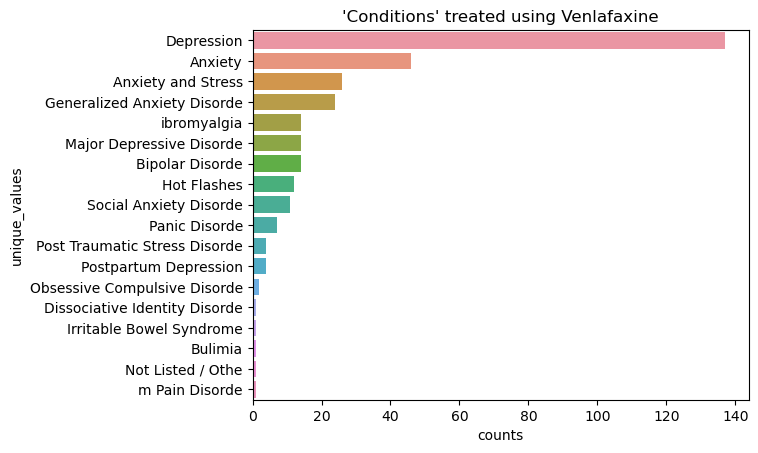

In [99]:
sns.barplot(venlafaxine_conditions, x="counts", y="unique_values").set(title="'Conditions' treated using Venlafaxine");

Venlafxaine is commonly used to treat:

1. depression
2. anxiety
3. stress
4. generalised anxiety disorder
5. and fibromylagia


In [100]:
#are there any drugs used to treat more than one condition?

In [101]:
popular_drugs.head(5)

drugName
Levonorgestrel                       1265
Etonogestrel                         1081
Ethinyl estradiol / norethindrone     869
Nexplanon                             736
Ethinyl estradiol / norgestimate      649
Name: count, dtype: int64

In [102]:
top_drugs=popular_drugs.to_frame().reset_index()

In [103]:
top_drugs.head()

,drugName,count
0,Levonorgestrel,1265
1,Etonogestrel,1081
2,Ethinyl estradiol / norethindrone,869
3,Nexplanon,736
4,Ethinyl estradiol / norgestimate,649


The most common drugs in this dataset are:

1. levonorgestrel
2. etonogestrel
3. ethninyl estradiol/northindrone
4. nexplanon
5. ethinyl estradiol/norgestimate

All five drugs are hormones used for birth control. One drug is listed by its brand name - Nexplanon. The other four are listed by their generic names.

There may be overlap in this dataset of drugs used. The brand and the generic drug names are used but haven't been tidied up. Nexplanon is the same drug as etonogestrel.

<Axes: ylabel='condition'>

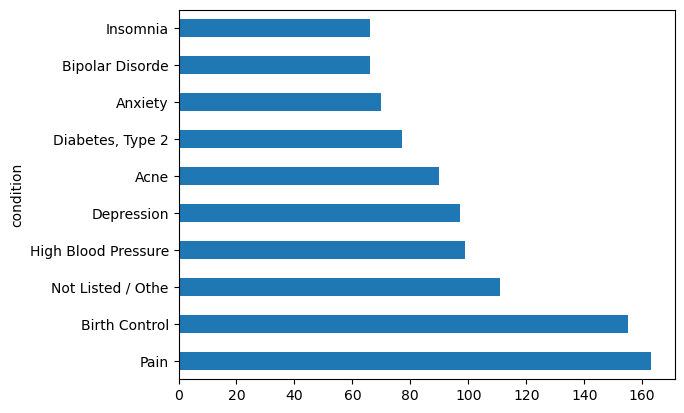

In [104]:
drug_data_df.groupby('condition')['drugName'].nunique().sort_values(ascending=False)[:10].plot(kind="barh")

From this dataset, clincial indications such as pain, birth control and high blood pressure are treated or managed by more than one drug.

CONCLUSION!

For my preliminary anaylsis I can identify the most commonly used drugs and the most common clinical indications for which these drugs are used for. 

The top five drugs used based on the number of 'conditions' treated:
1. gabapentin,
2. prednisolone
3. amitryptylline
4. venlafaxine
5. doxycycline

The least popular drugs used as per count:
1. Metrogel
2. Mevacor
3. Miacalcin
4. Micardis HCT
5. Miconazole/zinc oxide

Gabapentin is used to treat:
1. anxiety,
2. pain,
3. fibromyalgia
4. peripheral neuropathy
5. restless leg syndrome

Prednisolone is used to treat:
1. inflammatory conditions
2. postoperative ocular inflammation
3. bullous periphigold
4. dermatitis
5. iritis

Amitryptylline is used to treat:
1. migraine
2. pain
3. insomnia
4. fibromyalgia
5. anxiety and stress

Venlafaxine is used to treat:
1. depression
2. anxiety
3. anxiety and stress
4. generalised anxiety disorder
5. fibromyalgia


I've identified some further data cleaning required to reduce cases of synonomy in this dataset:

1. to unify brand names and generic names. For this I would ideally need to know from which country this dataset is from and that would detwermine which generic and brane names the country would have access to.
2. Spelling mistakes of data entries - for example 'fibromyalgia' and 'ibromaylgia'
3. data entry of a range of clinical conditoons which may mean the same thing, but are called different things. An example of this is heart attack, mycardial infarction, cardiac arrest.

Further analysis will include removing duplicates.

Tokenization.

This is the first step in many NLP processes. This process pulls apart text into small chunks of words or sentences. We label these as tokens. By analysing words in a sentence we can find meaning in large volumes of data - the data being reviews from a drug subset.

In [105]:
drug_name4='Venlafaxine'
filter=df['drugName']==drug_name4
df[filter]

,drugName,condition,review,rating,date,usefulCount
79,Venlafaxine,Depression,"""I was first prescribed Effexor 13 years ago a...",8,13-Dec-10,36
81,Venlafaxine,Depression,"""I took Effexor for the first and last time ye...",1,12-Oct-17,5
223,Venlafaxine,Depression,"""Horrible side effects! I tried Ciprelex (esci...",1,15-Jun-16,24
586,Venlafaxine,Major Depressive Disorde,"""I&#039;ve been on Effexor xr for 2 weeks and ...",10,8-Jul-16,30
712,Venlafaxine,Anxiety,"""I suffered with severe anxiety, especially in...",9,23-Dec-13,22
...,...,...,...,...,...,...
52286,Venlafaxine,Generalized Anxiety Disorde,"""Changes my life for the better!""",10,10-Mar-14,62
52683,Venlafaxine,Anxiety and Stress,"""I have multiple health issues and am very anx...",8,24-Apr-11,13
52904,Venlafaxine,Depression,"""Though the medication helped my depression, I...",3,22-Jan-17,2
52953,Venlafaxine,Depression,"""this med did its job reasonably. Didn&#039;t ...",6,16-Aug-16,1


In [106]:
nlp_drug=df[filter]

In [107]:
nlp_drug.head(5)

,drugName,condition,review,rating,date,usefulCount
79,Venlafaxine,Depression,"""I was first prescribed Effexor 13 years ago a...",8,13-Dec-10,36
81,Venlafaxine,Depression,"""I took Effexor for the first and last time ye...",1,12-Oct-17,5
223,Venlafaxine,Depression,"""Horrible side effects! I tried Ciprelex (esci...",1,15-Jun-16,24
586,Venlafaxine,Major Depressive Disorde,"""I&#039;ve been on Effexor xr for 2 weeks and ...",10,8-Jul-16,30
712,Venlafaxine,Anxiety,"""I suffered with severe anxiety, especially in...",9,23-Dec-13,22


In [122]:
nlp_drug.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320 entries, 79 to 53618
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   drugName      320 non-null    object
 1   condition     320 non-null    object
 2   review        320 non-null    object
 3   rating        320 non-null    int64 
 4   date          320 non-null    object
 5   usefulCount   320 non-null    int64 
 6   tokens_count  320 non-null    object
dtypes: int64(2), object(5)
memory usage: 20.0+ KB


In [131]:
nlp_drug['review'].unique()

array(['"I was first prescribed Effexor 13 years ago and was taking 225 mg. I was on it for a few years and stopped taking when I was pregnant with my first child. I was put on Paxil (gained so much weight) and then Zoloft. I took the Zoloft off and on for years until it just wasn&#039;t working for me anymore. I was then put on Welbutrin while still taking 25mg of Zoloft. I quit smoking (had no desire to smoke) but then became suicidal. My doctor then put me back on Effexor and I currently only take 75 mg. I feel amazing. Yeah the side effects are bad, I&#039;ve gained weight (lost weight the first time I was on it), have sexual side effects, and get quite shaky/jittery if I&#039;m late on a dose. But I&#039;m finally the mom I&#039;ve always wanted to be."',
       '"I took Effexor for the first and last time yesterday around 7:41 am . At first I couldn&#039;t feel my arms or face and then it felt like fire works were going off in my head . I yawned all day long and each time I did I

In [134]:
nlp_drug=[nlp_drug['rating']=='10'][['condition']]

<>:1: SyntaxWarning: list indices must be integers or slices, not list; perhaps you missed a comma?
<>:1: SyntaxWarning: list indices must be integers or slices, not list; perhaps you missed a comma?
/var/folders/z4/y29hfzpj47dd0krx452vm5940000gn/T/ipykernel_10417/1568366645.py:1: SyntaxWarning: list indices must be integers or slices, not list; perhaps you missed a comma?
  nlp_drug=[nlp_drug['rating']=='10'][['condition']]
/var/folders/z4/y29hfzpj47dd0krx452vm5940000gn/T/ipykernel_10417/1568366645.py:1: SyntaxWarning: list indices must be integers or slices, not list; perhaps you missed a comma?
  nlp_drug=[nlp_drug['rating']=='10'][['condition']]
/var/folders/z4/y29hfzpj47dd0krx452vm5940000gn/T/ipykernel_10417/1568366645.py:1: SyntaxWarning: list indices must be integers or slices, not list; perhaps you missed a comma?
  nlp_drug=[nlp_drug['rating']=='10'][['condition']]
/var/folders/z4/y29hfzpj47dd0krx452vm5940000gn/T/ipykernel_10417/1568366645.py:1: SyntaxWarning: list indices mus

TypeError: list indices must be integers or slices, not list

In [123]:
nlp_drug=nlp_drug.dropna(subset=['review'])

nlp_drug.shape

(320, 7)

In [128]:
substitute_no_space=re.compile(r"[.;:!\'?,\"()\[\]]")
substitute_with_space=re.compile(r"(,br\s*/><br\s*/.|(\/))")

def clean_text(review):
    review=re.sub(substitute_no_space, "", review)
    review=re.sub(substitute_with_space, " ", review)
    doc==spacy_nlp(review)
    lemmas=[]

    for token in doc:
        if not token.is_punct and not token.is_space and not token.is_stop:
            lemmas.append(token.lemma_.lower())
    return lemmas
    

In [130]:
text=nlp_drug['review'][1]

print('after cleaning: ', clean(review))

KeyError: 1

In [108]:
import re
from collections import Counter
import spacy

def count_tokens(text):
    spacy_nlp = spacy.blank("en")
    text=re.sub('[^A-Za-z0-9.,!?/:;\"\'\s]+',' ',text)
    doc = spacy_nlp(text.lower())
    out = Counter([tok.text for tok in doc])
    total_tokens = len(out.keys())
    return total_tokens, out

In [109]:
nlp_drug["tokens_count"]=nlp_drug["review"].apply(count_tokens)
print(nlp_drug["tokens_count"])

79       (92, {'"': 2, 'i': 14, 'was': 7, 'first': 3, '...
81       (79, {'"': 2, 'i': 8, 'took': 1, 'effexor': 1,...
223      (97, {'"': 2, 'horrible': 1, 'side': 2, 'effec...
586      (61, {'"': 2, 'i': 6, '039;ve': 1, 'been': 2, ...
712      (69, {'"': 2, 'i': 5, 'suffered': 1, 'with': 1...
                               ...                        
52286    (8, {'"': 2, 'changes': 1, 'my': 1, 'life': 1,...
52683    (106, {'"': 2, 'i': 5, 'have': 3, 'multiple': ...
52904    (57, {'"': 2, 'though': 1, 'the': 3, 'medicati...
52953    (99, {'"': 2, 'this': 1, 'med': 1, 'did': 2, '...
53618    (26, {'"': 2, 'i': 3, '039;m': 3, 'on': 1, '75...
Name: tokens_count, Length: 320, dtype: object


/var/folders/z4/y29hfzpj47dd0krx452vm5940000gn/T/ipykernel_10417/2936175458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nlp_drug["tokens_count"]=nlp_drug["review"].apply(count_tokens)


In [110]:
text=nlp_drug["tokens_count"]

In [111]:
text.head(5)

79     (92, {'"': 2, 'i': 14, 'was': 7, 'first': 3, '...
81     (79, {'"': 2, 'i': 8, 'took': 1, 'effexor': 1,...
223    (97, {'"': 2, 'horrible': 1, 'side': 2, 'effec...
586    (61, {'"': 2, 'i': 6, '039;ve': 1, 'been': 2, ...
712    (69, {'"': 2, 'i': 5, 'suffered': 1, 'with': 1...
Name: tokens_count, dtype: object

In [112]:
#†o tokenize text
def to_lowercase(text):
    return text.lower()

print(text)

79       (92, {'"': 2, 'i': 14, 'was': 7, 'first': 3, '...
81       (79, {'"': 2, 'i': 8, 'took': 1, 'effexor': 1,...
223      (97, {'"': 2, 'horrible': 1, 'side': 2, 'effec...
586      (61, {'"': 2, 'i': 6, '039;ve': 1, 'been': 2, ...
712      (69, {'"': 2, 'i': 5, 'suffered': 1, 'with': 1...
                               ...                        
52286    (8, {'"': 2, 'changes': 1, 'my': 1, 'life': 1,...
52683    (106, {'"': 2, 'i': 5, 'have': 3, 'multiple': ...
52904    (57, {'"': 2, 'though': 1, 'the': 3, 'medicati...
52953    (99, {'"': 2, 'this': 1, 'med': 1, 'did': 2, '...
53618    (26, {'"': 2, 'i': 3, '039;m': 3, 'on': 1, '75...
Name: tokens_count, Length: 320, dtype: object


In [113]:
def remove_numbers(text):
    pattern=r'[^a-zA-z.,!?/:;\"\'\s]'
    return re.sub(pattern, '', text)
print(text)

79       (92, {'"': 2, 'i': 14, 'was': 7, 'first': 3, '...
81       (79, {'"': 2, 'i': 8, 'took': 1, 'effexor': 1,...
223      (97, {'"': 2, 'horrible': 1, 'side': 2, 'effec...
586      (61, {'"': 2, 'i': 6, '039;ve': 1, 'been': 2, ...
712      (69, {'"': 2, 'i': 5, 'suffered': 1, 'with': 1...
                               ...                        
52286    (8, {'"': 2, 'changes': 1, 'my': 1, 'life': 1,...
52683    (106, {'"': 2, 'i': 5, 'have': 3, 'multiple': ...
52904    (57, {'"': 2, 'though': 1, 'the': 3, 'medicati...
52953    (99, {'"': 2, 'this': 1, 'med': 1, 'did': 2, '...
53618    (26, {'"': 2, 'i': 3, '039;m': 3, 'on': 1, '75...
Name: tokens_count, Length: 320, dtype: object


In [114]:
def lemmatize(text, nlp):
    doc=nlp(text)
    lemmatized_text=[]
    for token in doc:
        lemmatized_text.append(token.lemma_)
    return " ".join(lemmatized_text)
print(text)

79       (92, {'"': 2, 'i': 14, 'was': 7, 'first': 3, '...
81       (79, {'"': 2, 'i': 8, 'took': 1, 'effexor': 1,...
223      (97, {'"': 2, 'horrible': 1, 'side': 2, 'effec...
586      (61, {'"': 2, 'i': 6, '039;ve': 1, 'been': 2, ...
712      (69, {'"': 2, 'i': 5, 'suffered': 1, 'with': 1...
                               ...                        
52286    (8, {'"': 2, 'changes': 1, 'my': 1, 'life': 1,...
52683    (106, {'"': 2, 'i': 5, 'have': 3, 'multiple': ...
52904    (57, {'"': 2, 'though': 1, 'the': 3, 'medicati...
52953    (99, {'"': 2, 'this': 1, 'med': 1, 'did': 2, '...
53618    (26, {'"': 2, 'i': 3, '039;m': 3, 'on': 1, '75...
Name: tokens_count, Length: 320, dtype: object


In [115]:
#remove stopwords
def remove_stopwords(text,nlp):
    filtered_sentence=[]
    doc=nlp(text)
    for token in doc:
        if token.is_stop==False:
            filtered_sentence.append(token.text)
    return " ".join(filtered_sentence)
nlp=spacy.load("en_core_web_sm", disable=["parser", "ner"])

print(text)

79       (92, {'"': 2, 'i': 14, 'was': 7, 'first': 3, '...
81       (79, {'"': 2, 'i': 8, 'took': 1, 'effexor': 1,...
223      (97, {'"': 2, 'horrible': 1, 'side': 2, 'effec...
586      (61, {'"': 2, 'i': 6, '039;ve': 1, 'been': 2, ...
712      (69, {'"': 2, 'i': 5, 'suffered': 1, 'with': 1...
                               ...                        
52286    (8, {'"': 2, 'changes': 1, 'my': 1, 'life': 1,...
52683    (106, {'"': 2, 'i': 5, 'have': 3, 'multiple': ...
52904    (57, {'"': 2, 'though': 1, 'the': 3, 'medicati...
52953    (99, {'"': 2, 'this': 1, 'med': 1, 'did': 2, '...
53618    (26, {'"': 2, 'i': 3, '039;m': 3, 'on': 1, '75...
Name: tokens_count, Length: 320, dtype: object


In [116]:
#from collections import Counter
#import spacy



In [117]:
#token_list=[]
#for token in my_doc:
    #token_list.append(token.text)

#print(token_list)

In [118]:
#from collections import Counter
#import spacy

#spacy_nlp=spacy.blank("en")
#doc=spacy_nlp("this is text, this is text")
#out=Counter([tok.text for tok in doc])
#out.keys()
#len(out.keys())

In [119]:
#def count_tokens(text):
#   spacy_nlp = spacy.blank("en")
#  doc = spacy_nlp(text.lower())
#   out = Counter([tok.text for tok in doc])
#    total_tokens = len(out.keys())
#    return total_tokens, out

In [120]:
#drug_data_df.head(2)

In [121]:
#drug_data_df[['total_tokens', 'tokens']]=drug_data_df['review'].apply(count_tokens)